1. Таблица находится в 1 НФ. Значения атомарны.
2. Приведение ко 2 НФ.Считаю, что выделять такую сущность как adress в данной таблице не следует, потому что у нас нет дубликатов по client_id, если бы у клиента было несколько адресов, то тогда было бы целесообразно выделить в отдельную таблицу. Выделим сущность Products. Сненерировать id для сущности, так как product_id в таблице transaction не является настоящим идентификатором продукта.
3. Приведение к 3 НФ.Создали связывающую таблицу Transaction. 

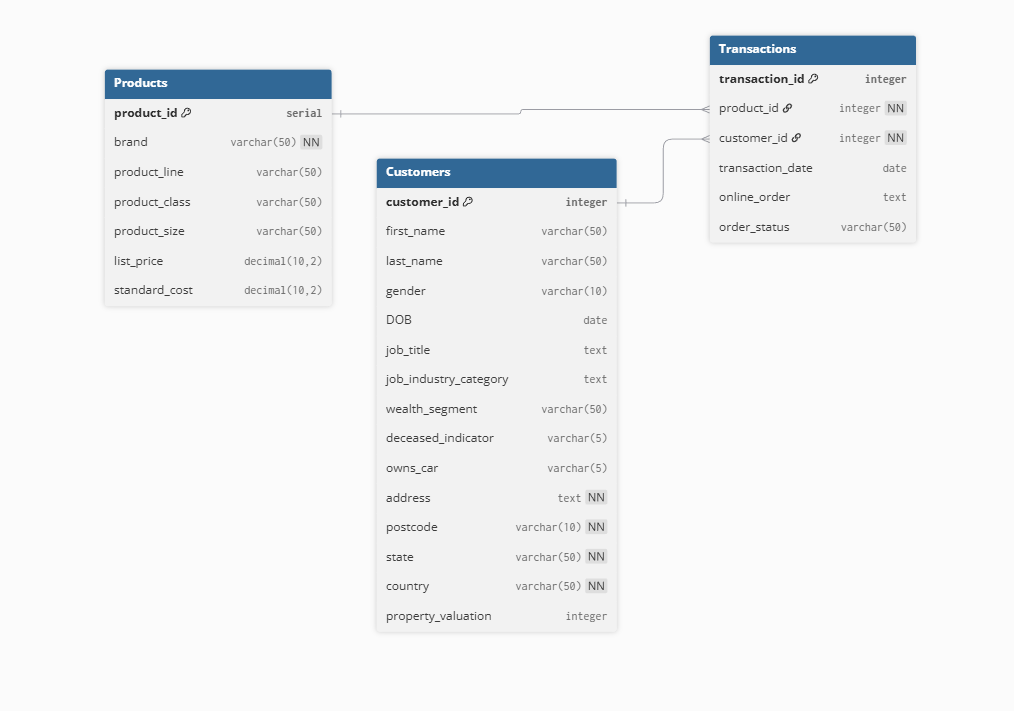



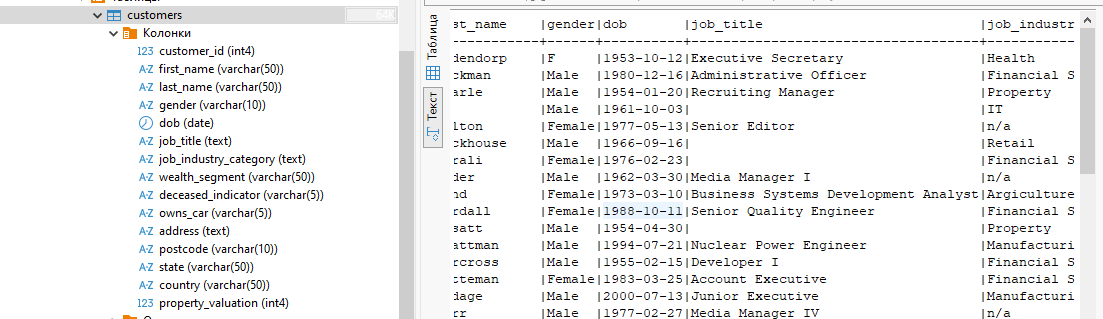


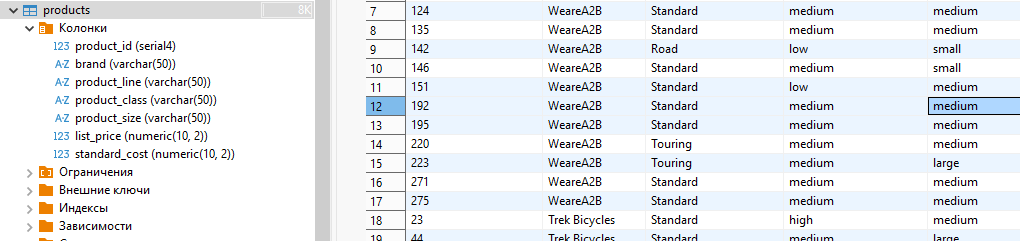

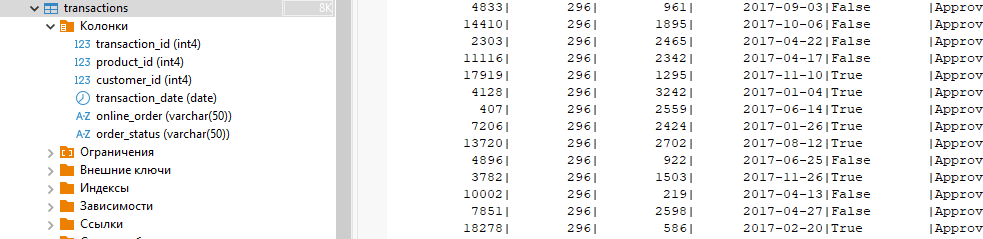

In [4]:
CREATE DATABASE customer_transactions; --создаем базу данных

--создаем таблицу с продуктами генерируем айди\ удаляем дубликаты в связке
CREATE TABLE Products (
    product_id SERIAL PRIMARY KEY,
    brand VARCHAR(50),
    product_line VARCHAR(50),
    product_class VARCHAR(50),
    product_size VARCHAR(50),
    list_price DECIMAL(10, 2),
    standard_cost DECIMAL(10, 2),
    CONSTRAINT unique_product UNIQUE (brand, product_line, product_class, product_size, list_price, standard_cost)
);

--назначаем первичный ключ
CREATE TABLE Customers (
    customer_id INT PRIMARY KEY,
    first_name VARCHAR(50),
    last_name VARCHAR(50),
    gender VARCHAR(10),
    DOB DATE,
    job_title TEXT,
    job_industry_category TEXT,
    wealth_segment VARCHAR(50),
    deceased_indicator VARCHAR(5),
    owns_car VARCHAR(5),
    address TEXT NOT NULL,
    postcode VARCHAR(10) NOT NULL,
    state VARCHAR(50) NOT NULL,
    country VARCHAR(50) NOT NULL,
    property_valuation INT
);

--назначаем первичный ключ/внешние ключи
CREATE TABLE Transactions (
    transaction_id INT PRIMARY KEY,
    product_id INT NOT NULL,
    customer_id INT NOT NULL,
    transaction_date DATE,
    online_order VARCHAR (50),
    order_status VARCHAR(50),
    FOREIGN KEY (product_id) REFERENCES Products (product_id),
    FOREIGN KEY (customer_id) REFERENCES Customers (customer_id)
);


--создаем таблицу для джойна
CREATE TABLE temp_transactions_import (
    transaction_id INT,
    product_id INT,
    customer_id INT,
    transaction_date VARCHAR,
    online_order VARCHAR,
    order_status VARCHAR,
    brand VARCHAR,
    product_line VARCHAR,
    product_class VARCHAR,
    product_size VARCHAR,
    list_price VARCHAR,
    standard_cost VARCHAR
);

--заливаем таблицу с продуктами. меняем данные в ценах так как сейчас это текст
INSERT INTO Products (brand, product_line, product_class, product_size, list_price, standard_cost)
SELECT DISTINCT 
    brand,
    product_line,
    product_class,
    product_size,
    CAST(REPLACE(list_price, ',', '') AS DECIMAL(10,2)),
    CAST(REPLACE(standard_cost, ',', '') AS DECIMAL(10,2))
FROM temp_transactions_import;


--заливаем таблицу транзакций\меняем формат даты \объединяем данные из двух таблиц
INSERT INTO Transactions (transaction_id, product_id, customer_id, transaction_date, online_order, order_status)
SELECT 
    t.transaction_id,
    p.product_id,
    t.customer_id,
    TO_DATE(t.transaction_date, 'MM/DD/YYYY'),
    t.online_order,
    t.order_status
FROM temp_transactions_import t
JOIN Products p ON t.brand = p.brand 
    AND t.product_line = p.product_line 
    AND t.product_class = p.product_class 
    AND t.product_size = p.product_size;

DROP TABLE temp_transactions_import;--удаляем временную таблицу

SyntaxError: invalid syntax (Temp/ipykernel_14776/3450802353.py, line 1)